In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Mall_Customers.csv")  # Ensure this CSV file is in your working directory
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Perform Feature Scaling

In [3]:
import pandas as pd

# Load data
df = pd.read_csv("Mall_Customers.csv")

# Select features
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


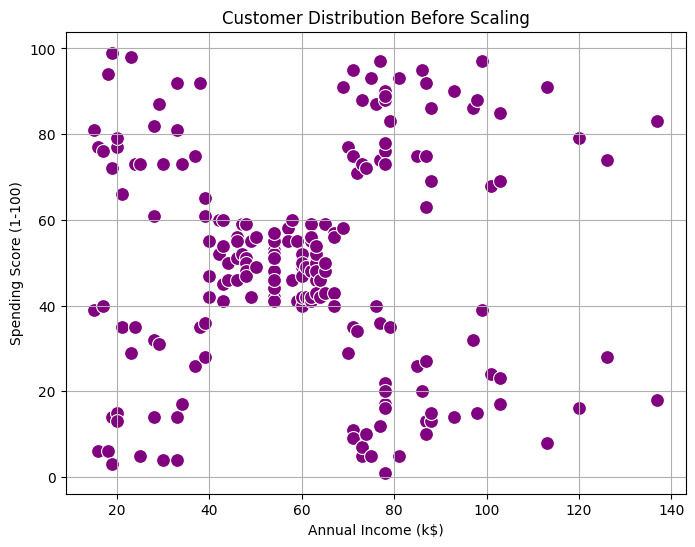

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=features,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    s=100,
    color='purple'
)
plt.title('Customer Distribution Before Scaling')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


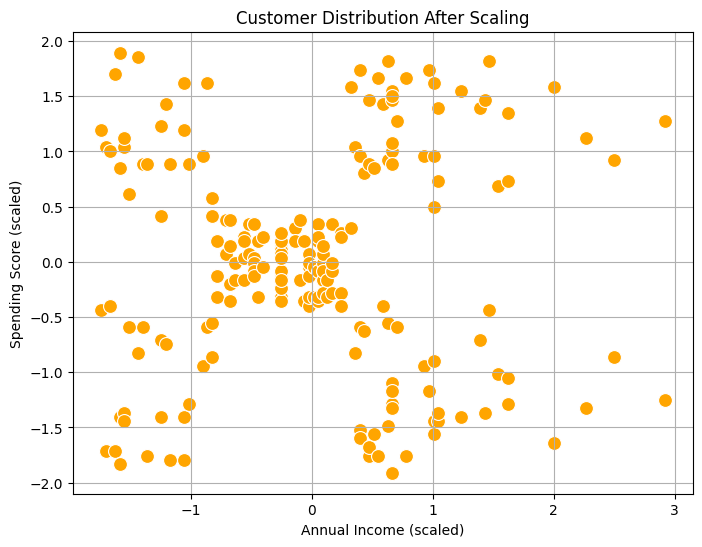

In [6]:
scaled_df = pd.DataFrame(scaled_features, columns=['Annual Income (scaled)', 'Spending Score (scaled)'])

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=scaled_df,
    x='Annual Income (scaled)',
    y='Spending Score (scaled)',
    s=100,
    color='orange'
)
plt.title('Customer Distribution After Scaling')
plt.grid(True)
plt.show()


# Apply K-Means clustering and determine optimal number of clusters

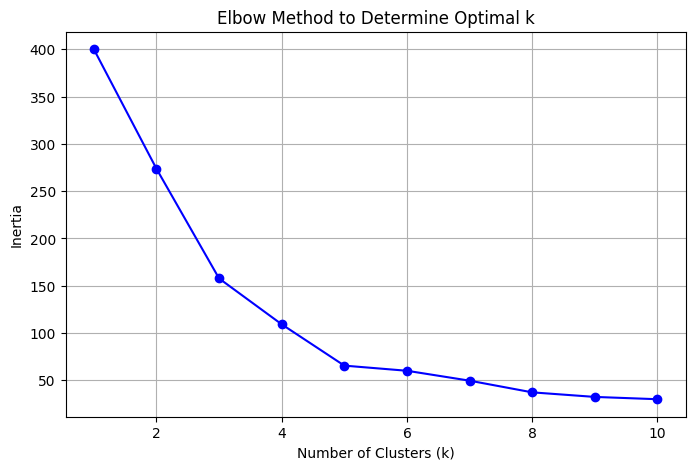

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()


In [8]:
# Apply KMeans with optimal clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters


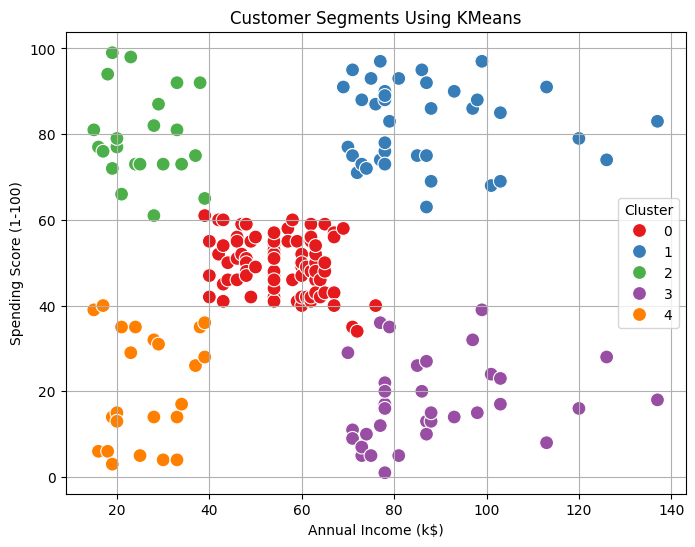

In [9]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1',
    s=100
)
plt.title('Customer Segments Using KMeans')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


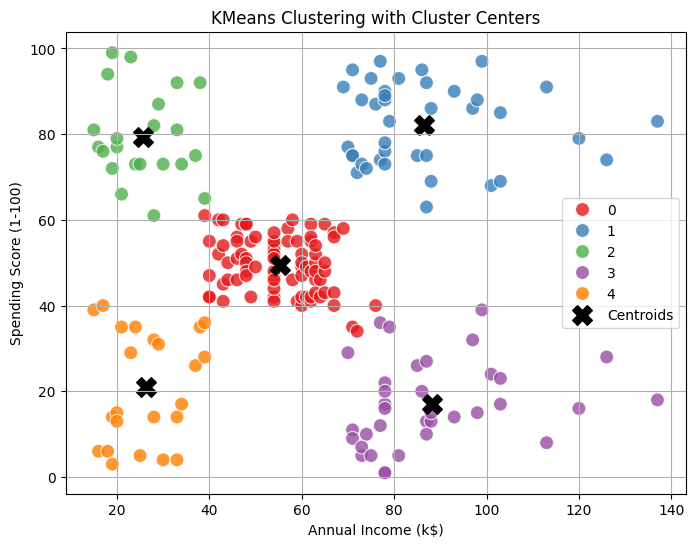

In [11]:
# Get cluster centers (in scaled form), transform back to original scale
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

# Plot with centers
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1',
    s=100,
    alpha=0.8
)

# Plot cluster centers
plt.scatter(
    centers_original[:, 0], centers_original[:, 1],
    c='black', s=200, marker='X', label='Centroids'
)

plt.title('KMeans Clustering with Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


# Try DBSCAN (Density-Based Clustering)

In [12]:
from sklearn.cluster import DBSCAN

# DBSCAN requires scaled features
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can experiment with these values
db_labels = dbscan.fit_predict(scaled_features)

# Add DBSCAN cluster labels to DataFrame
df['DBSCAN_Cluster'] = db_labels


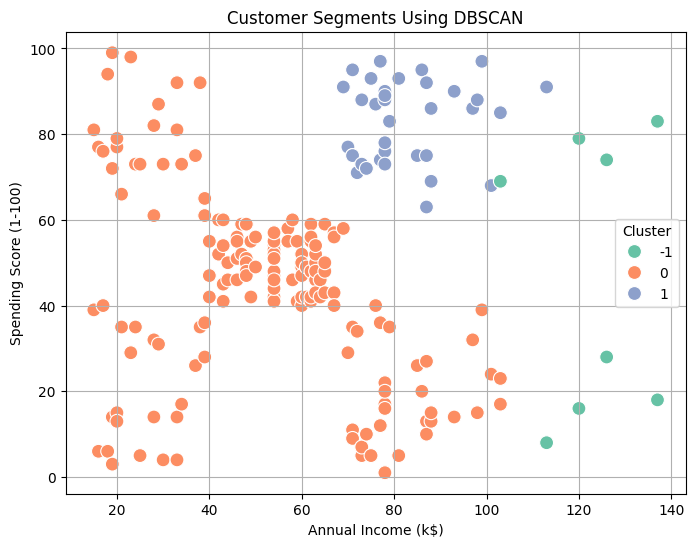

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['DBSCAN_Cluster'],
    palette='Set2',
    s=100
)
plt.title('Customer Segments Using DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# Analyze Average Spending per Cluster

In [14]:
# Average Annual Income & Spending Score per KMeans cluster
kmeans_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("KMeans Cluster Summary:")
print(kmeans_summary)


KMeans Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [15]:
# Average Annual Income & Spending Score per DBSCAN cluster
dbscan_summary = df.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("DBSCAN Cluster Summary:")
print(dbscan_summary)


DBSCAN Cluster Summary:
                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                      122.750000               46.875000
 0                       52.490446               43.101911
 1                       82.542857               82.800000
